In [1]:
!pip install keras_ocr==0.8.7
!pip install imgaug==0.2.5
!pip install matplotlib==3.3.0

In [2]:
import matplotlib.pyplot as plt
import keras_ocr

# 사전 훈련된 keras-ocr 다운로드 (가중치)
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


/usr/local/lib/python3.7/dist-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


<AxesSubplot:>

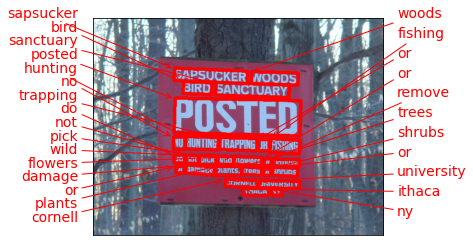

In [5]:
img = 'https://t1.daumcdn.net/cfile/blog/990C26485AB8E6D706'
img = keras_ocr.tools.read(img)

# Prediction_groups는 (단어, 상자) 튜플 유형
prediction_groups = pipeline.recognize([img])

# 시각화
keras_ocr.tools.drawAnnotations(image=img, predictions=prediction_groups[0])

In [6]:
prediction_groups[0][4]

('posted', array([[164.49734, 162.28827],
        [416.1431 , 167.79874],
        [414.6038 , 238.0935 ],
        [162.95804, 232.58304]], dtype=float32))

In [7]:
import math
import numpy as np
import cv2


def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2) / 2)
    y_mid = int((y1 + y2) / 2)

    return (x_mid, y_mid)

# "posted"이라는 단어에 대한 라인 마스크 예시
box = prediction_groups[0][4]

x0, y0 = box[1][0]
x1, y1 = box[1][1]
x2, y2 = box[1][2]
x3, y3 = box[1][3]

x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
x_mid1, y_mid1 = midpoint(x0, y0, x3, y3)
thickness = int(math.sqrt( (x2 - x1) ** 2 + (y2 - y1) ** 2 ) )
print(thickness)

70


In [8]:
# mask 변수에 0 값으로 채워진 img 크기의 np array 생성
# mask 처리 할 이미지 파일, 선 시작 좌표, 선 종료 좌표,  RGB 형태의 선 색상, 선 두께

mask = np.zeros(img.shape[:2], dtype="uint8")
cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mid1), 255, thickness)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

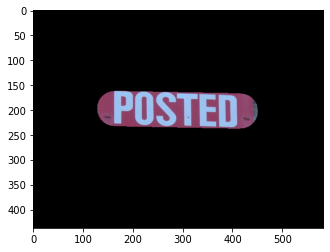

In [9]:
# 두 이미지의 동일한 위치에 대한 비트연산(and)

masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(masked)

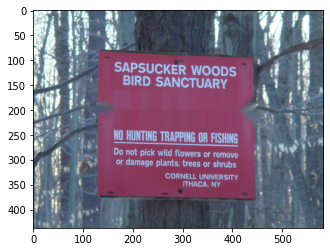

In [10]:
# INPAINT_NS 방법을 통해 inpaint

img_inpainted = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
plt.imshow(img_inpainted)

In [ ]:
# 이미지 저장을 위해 RGB 형식으로 변환

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.imwrite('text_remove.jpg', img_rgb)

True

In [11]:
# 삭제할 단어 리스트에 저장

remove_word_list = ['bird', 'posted', 'sanctuary']

In [12]:
def inpaint_text(img_path, remove_list, pipeline):
    # 이미지 로드
    img = keras_ocr.tools.read(img_path)
    # Prediction_groups는 (단어, 박스 좌표 값) 튜플 유형
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        if box[0] in remove_list:
           x0, y0 = box[1][0]
           x1, y1 = box[1][1] 
           x2, y2 = box[1][2]
           x3, y3 = box[1][3] 
        
           x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
           x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
           thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
           cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255, thickness)
           img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
        plt.imshow(img)

    return(img)

array([[[250, 250, 255],
        [255, 254, 255],
        [255, 255, 248],
        ...,
        [ 83, 120, 129],
        [ 91, 123, 134],
        [121, 145, 155]],

       [[249, 255, 255],
        [251, 255, 255],
        [252, 255, 251],
        ...,
        [110, 141, 143],
        [113, 143, 145],
        [125, 151, 152]],

       [[248, 255, 255],
        [244, 255, 254],
        [235, 250, 245],
        ...,
        [136, 156, 165],
        [144, 164, 173],
        [130, 155, 160]],

       ...,

       [[ 67, 101, 126],
        [ 72, 106, 133],
        [ 78, 114, 140],
        ...,
        [ 72,  87, 108],
        [ 72,  87, 108],
        [ 70,  86, 109]],

       [[ 67, 101, 128],
        [ 74, 105, 134],
        [ 81, 112, 141],
        ...,
        [ 73,  88, 109],
        [ 72,  87, 108],
        [ 69,  87, 107]],

       [[ 77,  96, 129],
        [ 80, 103, 135],
        [ 82, 113, 144],
        ...,
        [ 75,  88, 105],
        [ 71,  87, 103],
        [ 68,  87, 102]]

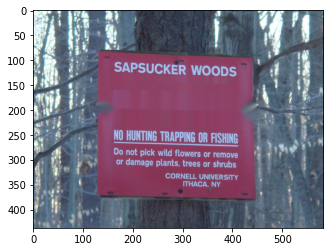

In [13]:
img_path = 'https://t1.daumcdn.net/cfile/blog/990C26485AB8E6D706'
inpaint_text(img_path, remove_word_list, pipeline)